In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
# append calories column next to the exercises
data = pd.concat([exercise, calories['Calories']], axis=1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
# check number of rows and columns
data.shape

(15000, 9)

In [8]:
# getting info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
# getting missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
# statistical measures about the data
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
# data visualization
sns.set()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();
data['Gender']= le.fit_transform(data['Gender'])
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: ylabel='count'>

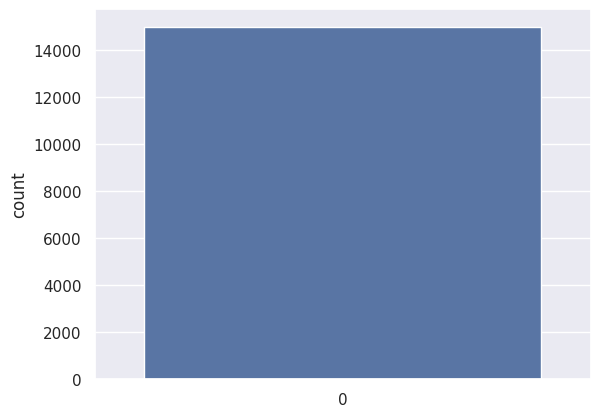

In [13]:
sns.countplot(data.Gender)

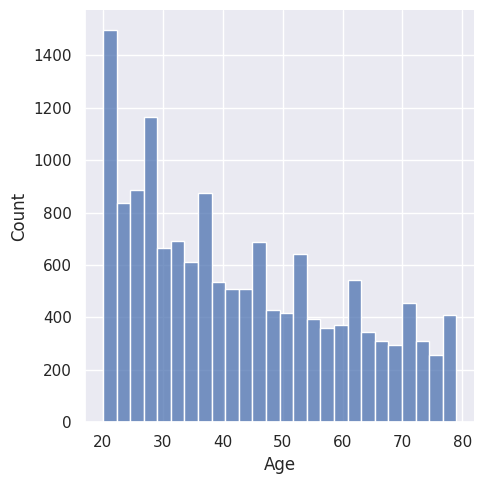

In [14]:
# finding distributution of data wrt age
sns.displot(data.Age);

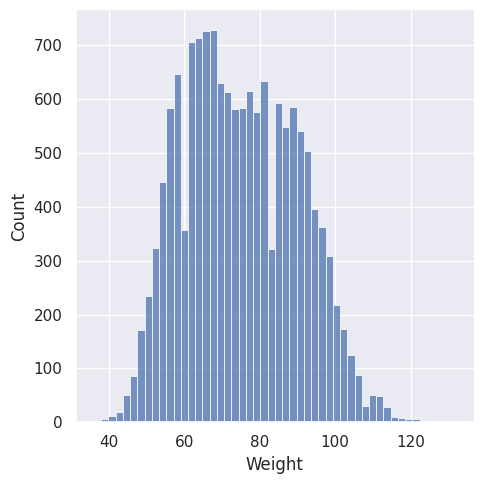

In [18]:
# finding distributution of data wrt Weight
sns.displot(data.Weight);

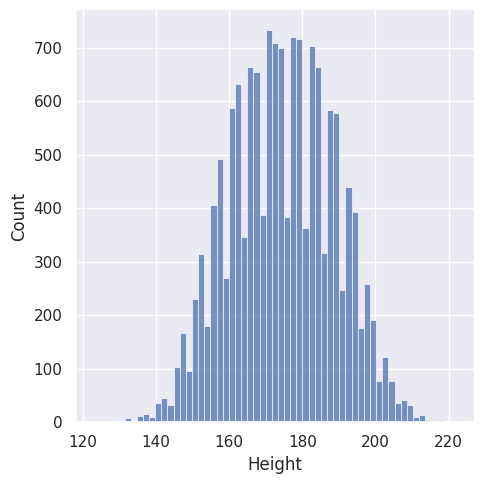

In [19]:
# finding distributution of data wrt height
sns.displot(data.Height);

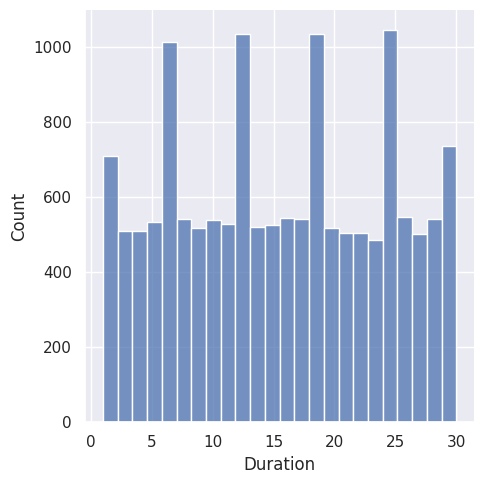

In [20]:
# finding distributution of data wrt height
sns.displot(data.Duration);

In [22]:
# finding correlation in dataset
# there are two types of correlation: positive and negative
correlation = data.corr()
print(correlation)

             User_ID    Gender       Age    Height    Weight  Duration  \
User_ID     1.000000 -0.000687 -0.001827 -0.013520 -0.011603 -0.002751   
Gender     -0.000687  1.000000  0.003222  0.710534  0.783186  0.003440   
Age        -0.001827  0.003222  1.000000  0.009554  0.090094  0.013247   
Height     -0.013520  0.710534  0.009554  1.000000  0.958451 -0.004625   
Weight     -0.011603  0.783186  0.090094  0.958451  1.000000 -0.001884   
Duration   -0.002751  0.003440  0.013247 -0.004625 -0.001884  1.000000   
Heart_Rate -0.000457  0.011555  0.010482  0.000528  0.004311  0.852869   
Body_Temp   0.000923  0.007264  0.013175  0.001200  0.004095  0.903167   
Calories   -0.001661  0.022357  0.154395  0.017537  0.035481  0.955421   

            Heart_Rate  Body_Temp  Calories  
User_ID      -0.000457   0.000923 -0.001661  
Gender        0.011555   0.007264  0.022357  
Age           0.010482   0.013175  0.154395  
Height        0.000528   0.001200  0.017537  
Weight        0.004311   0.00

<Axes: >

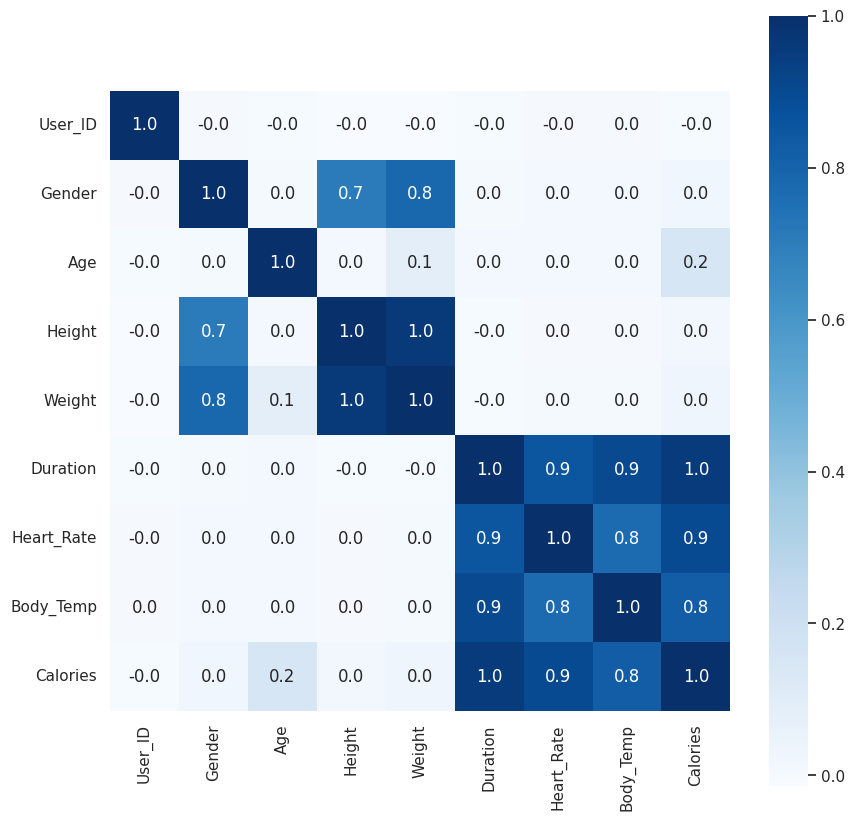

In [27]:
# construct a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='Blues')

In [31]:
# split into X and y
X = data.drop(columns=['User_ID','Calories'], axis=1)
y = data['Calories']

In [32]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [33]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

In [45]:
# XGBoost regressor
model = XGBRegressor()

In [46]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
y_preds = model.predict(X_test)

In [48]:
# mean absolute error
mae = metrics.mean_absolute_error(y_test, y_preds)
mae

1.4807048829992613

In [49]:
r2 = metrics.r2_score(y_test, y_preds)
r2

0.9988455491362879

In [52]:
import pickle

pickle.dump(model, open("XGB_model.pkl","wb"))
loaded_gs_model = pickle.load(open("XGB_model.pkl", "rb"))
pickle_y_preds = loaded_gs_model.predict(X_test)
metrics.r2_score(y_test, y_preds)

0.9988455491362879